# Assignment A : Jordi & the Dragon

It is time to put in practice what you learned in the past weeks. 

In this first assignment you will be asked to help a clumsy aerospace engineer, Jordi who works in Montblanc, to find the weak spots of the "Dragon", a dangerous aircraft that is menacing his country!

![The Dragon](dragon.jpg)
<h4><center>The Dragon</center></h4>

You will help him by programming the algorithms you learned in Modules 1 and 2. 

In particular you need to substitute with your code all the `raise NotImplementedError` and triple dots `...`.  You are obviously free to change the already designated variables' names (although discouraged), just be careful to change them everywhere they appear.
You will have to submit this entire notebook, but the grade will be awarded based on whether you get the correct value at the end.

Let's dive in.


## Root Finding (Module \#1)

### Introduction
During the lectures we learned that the interpolation error is proportional to the nodal polynomial associated to a grid, in particular
$$
e_n(f;x) := f(x) - \phi(x) = \frac{f^{(n+1)}(\xi)}{(n+1)!}\,\omega_{n+1}(x),
$$
where $\xi = \xi(x) \in [a,b]$ and $\omega_{n+1}(x)$ is the <i>nodal polynomial</i> associated with the grid $\mathbf{x}$, defined as,
$$
\omega_{n+1}(x) := \prod_{i=0}^n (x-x_i).
$$
We don't have control over the derivative of the function  $f^{(n+1)}(\xi) $, but surely we can control the infinity norm (maximum absolute value) of the nodal polinomial $|| \omega_{n+1}(x) ||_{\infty}$ by carefully choosing the points at which we are interpolating.

Our Jordi is trying to simulate the flow over the wings of the "Dragon" but he cannot find a good grid for it!

One of the most common grids used in Finite Elements Methods, is the *Legendre-Guass-Lobatto grid*.  The LGL grid can be defined as the roots of the following polinomial
$$ 
p(x) = (1 - x^2) L_n^{'}(x)
$$
where $L_n^{'}(x)$ is the first derivative of the $n$-th Legendre polinomial. **Don't worry** about the definition of $L_n$, we will provide all the functions you need!

Unfortunately there are not analytical formulas to find the roots of the polynomial $p(x)$, the only option is to find them numerically.

Your first task is to find the roots of the polinomial using Newton's method.



### Helpers Functions
Here we provide the functions you will need to find the LGL grid points.  The function `legendre_prime(x, n)` evaluates $L_n'(x)$, and `legendre_double_prime()` similarly $L_n''(x)$.


In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import legendre
import scipy as sc
from functools import partial

In [4]:
def legendre_prime(x, n):
    """Calculate the first derivative of the nth Legendre Polynomial recursively.

    Args:
        x (float, np.array) = domain.
        n (int) = degree of Legendre polynomial (L_n).
    Return:
        legendre_p (np.array) = value first derivative of L_n.
    """
    # P'_n+1 = (2n+1) P_n + P'_n-1
    # where P'_0 = 0 and P'_1 = 1
    # source: http://www.physicspages.com/2011/03/12/legendre-polynomials-recurrence-relations-ode/
    if n == 0:
        if isinstance(x, np.ndarray):
            return np.zeros(len(x))
        elif isinstance(x, (int, float)):
            return 0
    if n == 1:
        if isinstance(x, np.ndarray):
            return np.ones(len(x))
        elif isinstance(x, (int, float)):
            return 1
    legendre_p = n * legendre(n - 1)(x) - n * x * legendre(n)(x)
    return legendre_p


def legendre_double_prime(x, n):
    """Calculate second derivative legendre polynomial recursively.

    Args:
        x (float,np.array) = domain.
        n (int) = degree of Legendre polynomial (L_n).
    Return:
        legendre_pp (np.array) = value second derivative of L_n.
    """
    legendre_pp = 2 * x * legendre_prime(x, n) - n * (n + 1) * legendre(n)(x)
    return legendre_pp

### Define the polynomial 
To warm up just implement the definition of the polynomial
$$ 
p(x) = (1 - x^2) L_n^{'}(x)
$$
and its derivative.

In [10]:
def poly(x, n):
    """Define the polynomial function p(x)
    Args:
        x (float/np.array) : domain
        n (int) : degree of the polynomial
    
    Returns:
        values (float/np.array) : polynomial evaluated in the domain


    """

    return (1-x^2) * legendre_prime(x,n)
    
    # TODO ... define p(x)
    raise NotImplementedError

In [1]:
def poly_prime(x, n):
    """Define the derivative of the polynomial function p(x)
    Args:
        x (float/np.array) : domain
        n (int) : degree of the polynomial
    
    Returns:
        values (float/np.array) : polynomial evaluated in the domain
    """

    return (1-x**2)*legendre_double_prime(x,n) - 2*x*legendre_prime(x,n)
    # TODO ... define p'(x)
    raise NotImplementedError

To make sure you correctly found the first derivative of the polynomial, plot `poly()` and `poly_prime()`, and check visually that the max/min of poly(x, n) corresponds to the roots of poly_prime.  Also, the maximum over $[-1,1]$ of `poly_prime(x, 5)` should be approximately 9.61.

NameError: name 'grid_points' is not defined

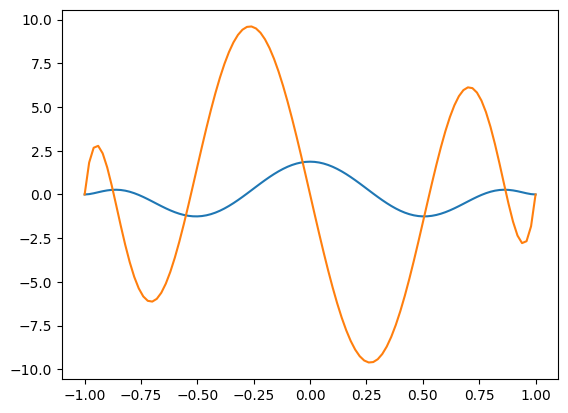

In [9]:
# TODO ... choose n, check your implementation
xx = np.linspace(-1,1,101)    # Grid on [-1,1] for plotting

raise NotImplementedError

### Newton's method
We will need Newton's method.  Here you should to implement the 1-d version of Newton.  You should stop the iteration if the maximum number of iterations is exceeded, or if the value of $|f(x_i)|$ become less than a small value. 

In [ ]:
def newton_method(f, dfdx, x_0, iter_max=100, min_error=1e-14):
    """Newton method for rootfinding.

    Args:
        f (function object): function to find root of, f: float -> float
        dfdx (function object): derivative of f, dfdx: float -> float
        x_0 (float): initial guess of root
        iter_max (int): max number of iterations
        min_error (float): min allowed error

    Returns:
        x_tilde (float): approximation of root of f
        x_history (np.array): history of convergence, [x_0, x_1, ..., x_N]
    """
    # TODO ... implement Newton with the above conditions
    raise NotImplementedError
    # ...
    return x_tilde, x_history

To test the implementation of the method, it is good to check that it finds a true root.  But another good check is that the convergence is quadratic, as the theory predicts.

Below we provide a function to plot the convergence history, that allows you to infer the rate of convergence of the root-finding method.

In [ ]:
def convergence_plot(f, history_convergence):
    """Display history of convergence.

    Args:
        f (obj func) = function whose root has been found
        history_convergence (np.array) = constains all intermediate points
        founds with the fixed pt method
    """
    residual_e, approximate_e = np.empty(
        len(history_convergence) - 1), np.empty(len(history_convergence) - 1)
    iteration = np.arange(len(history_convergence) - 1)
    for i in range(len(history_convergence) - 1):
        approximate_e[i] = abs(history_convergence[i] - history_convergence[-1])
        residual_e[i] = abs(f(history_convergence[i + 1]) - f(history_convergence[i]))
    
    plt.plot(iteration, np.log(residual_e), '-o', label=r'$\epsilon$ - Residual error')
    plt.plot(iteration, np.log(approximate_e), '-o', label=r'$e_k$ - Approximate error')
    plt.xlabel(r'$n$ - Number iterations'), plt.ylabel(r'log(e)')
    plt.legend(), plt.show()

# function you can use to test the root finding method
def function(x):
    return x**3 - 2*x**2 + x -2

def function_prime(x):
    return 3*x**2 - 4*x + 1

x_0 = 1.7
x, history_newton = newton_method(function, function_prime, x_0)
convergence_plot(function, history_newton)

### Grid
Finally we will find the Legendre-Gauss-Lobatto Grid! We will often call these points simply *Lobatto points*.

You will make use of Newton's method to find the grid points. As initial estimates of the locations of the Lobatto points we will use the Chebychev points (that we also saw in class). 

Now complete the `gauss_lobatto()` function - which will involve solving a root-find problem for each Lobatto point.

In [ ]:
def gauss_lobatto(n):
    """Calculate the roots of (1+x**2)*L'_n(x) and therefore find the n + 1 points of the LGL grid.
    Args:
        n : # subdivision of the grid -> correspond to n+1 points
    Returns:
        grid_points (np.array): n + 1 grid points
    """
    # Chebychev nodes as initial guesses for the Newton method.
    x_0 = np.cos(np.arange(1., n) / n * np.pi)
    
    # We fix the degree of the polynomial, pass these functions to the Newton Method.
    poly_fn = partial(poly, n=n)
    poly_prime_fn = partial(poly_prime, n=n)
    
    grid_points = np.empty(n + 1)
    # Last and first pts are fixed for every n
    grid_points[-1] = -1
    grid_points[0] = 1
    
    # Newton's method to find the root. Do to not overwrite the grid_points[0], grid_points[-1], i.e.
    # Use x_0[i] to find the grid_points[i+1]
    # TODO ... find the grid points using Newton's method for each point
    raise NotImplementedError
    # ...
    return grid_points

Let's compare the LGL grid, that Jordi wants to use, with the Chebychev one.  This will also serve to test your code.

In [ ]:
def chebychev(n):
    """Calculate roots of the n+1 Chebychev polynomial of the first kind.
    
    Returns:
        nodal_pts (np.array): n + 1 Chebychev grid points
    """
    i = np.arange(0, n+1)
    # nodal points in [-1,1]
    return np.cos((2.*i + 1.) / (2. * (n+1.)) * np.pi)

def plot_grids(grids, labels):
    """Plot multiple grids.

    Args:
        grids (list): list of grids
        labels (list): labels for each grid (strings)
    """
    for i, grid in enumerate(grids):
        plt.plot(grid, np.ones(np.size(grid)) * i, '-o', label=labels[i])
    plt.xlabel(r'$\xi$')
    plt.ylim(-1, np.ndim(grids) + 1)
    plt.legend(), plt.show()
        
# plot of the grids
n = 5
grid_lgl = gauss_lobatto(n)
grid_ch = chebychev(n)
plot_grids([grid_lgl, grid_ch], ['lobatto grid', 'chebychev grid'])

The two grids should be broadly similar, with Lobatto having nodes at the interval end-points (-1 and 1), while Chebychev doesn't.  Vary `n` and check this is still true.

Additionally your largest Lobatto point strictly less than `1` should be about `0.76505532` with `n=5`.  If this is not the case there is a mistake in your code.  (Careful that in the points appear in order of largest to smallest in the output of your function.)   Correct it before you continue with the next part.

Congratulations! You finished the first part of the assignment. 

## Interpolation (Module \#2)

### Introduction

The troubles of Jordi with the Dragon are not yet over. 
On his FEM-for-Dummies software, he pressed the button to run the simulation of the flow over the Dragon, which gave him the data on the LGL nodes.

After the simulation is finished he has the values of some flow properties at Lobatto points on the interval [0, 2].  Since he wants to know the value of the pressure coefficient everywhere along the full chord, he needs someone that is able to interpolate the data.

Since he is desperate and does not know what to do you will have to help him out interpolating the data he has.  However, because he's worried about rounding errors, he insists you use a Lagrange basis!

In [ ]:
from helpers import get_data

First of all let's fetch the data. You will get **N** data points located in the interval [0,2] on the LGL nodes. 
To get the data fill in your net_id **without** spaces in the string below.

In [ ]:
# TODO ... fill in your net_id
net_id = 'jordi'

def scale_grid(grid, a, b):
    """Linear scaling of the grid from [-1, 1] to [a, b].
    
    Args:
        grid (np.array): grid data points
        a, b (float): start, end interval        
    Return:
        scaled_grid (np.array): grid scaled to interval [a,b]
    """
    scaled_grid = (b - a)/2. * (grid + 1.)
    return scaled_grid[::-1]

N = 8
grid = gauss_lobatto(N)          # LGL grid on [0,1]
grid = scale_grid(grid, 0, 2)    # LGL grid on [0,2]

# Get the data (you can use this function to get your data on any grid)
data = get_data(grid, net_id)

### Basis Functions
Now you have the data and grid. The final ingredients missing are the basis functions for the interpolation.
Implement the *Lagrange basis functions* for the Lobatto nodes.  The function should return the value of *all* basis functions at a single location $x$.

In [ ]:
def basis_lagrange(x, grid):
    """
    Args:
        x (float): Location at which to evaluate the basis.
        grid (np.array): Grid nodes for which to construct basis.
    Return:
        phi (np.array): Basis functions at x, one per grid-point.
    """
    # TODO ... Implement Lagrange basis
    raise NotImplementedError

Check that you have implemented the basis correctly - you should get the identity matrix if you evaluate the basis at all the Lobatto nodes.

Now that we have a Lagrange basis - performing the interpolation is just a matter of computing
$$
\phi(x) = \sum_{i = 0}^{n} f_i l_i(x)
$$
where $\phi(x)$ is the interpolating function, $l_i$ the ith Langrange basis function, and $f_i$ the data at point $i$.

For plotting Jordi would like to know the interpolated function at 1000 uniformly distributed points along the interval [0, 2].

In [ ]:
def reconstruct(x, grid, data, basis):
    """Reconstruct the interpolating function
    Args:
        x (np.array): array of locations to evaluate interpolant
        grid (np.array): node locations 
        data (np.array): data values at each node
        basis (function object) : your function `basis_lagrange()`
    
    Returns:
        interpolant (np.array) : interpolant function evaluated in a domain of choice
    """
    # TODO ... find the interpolant
    raise NotImplementedError
    
# Plot original function, data and interpolant
x_out = np.linspace(0,2,101)
plt.plot(x_out, get_data(x_out, net_id))
plt.plot(grid, data, 'o')
plt.plot(x_out, reconstruct(x_out, grid, data, basis_lagrange))

If you interpolated correctly your function should pass through all the data points (check this), and be generally close to (but not exacly equal) to the reference function from `get_data()` as `N` increases.  If this is the case your code is likely correct.

Note, the actual function that you are interpolating has high frequency oscillations that are not visible with N=5.  Increase the number of interpolated points, say to 20 or 40. Make sure to plot it!

To get points for your assignment you should report the value of your interpolant at `x=1.25` for **`N=8`**.  First check that with a netid of `'jordi'` you get an interpolant value of `1.158397` with these settings.  If you get this value your code is probably correct.  Rerun *your full code* with **your netid**, and report the value of the interpolant at `x=1.25` for **`N=8`** in the following cell:

Final answer: Interpolant at x=1.25 is ...

## Conclusion
Thanks to your help, Jordi found the weak spot of the Dragon and in defeating it, he saved his country from chaos!